In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
df= pd.read_csv('pair_nulos.csv',index_col = 0)

In [4]:
df.head(2)

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,lattitude,longitude,continente
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            195 non-null    object 
 1   density                            195 non-null    float64
 2   abbreviation                       188 non-null    object 
 3   agriculturalland                   188 non-null    float64
 4   landarea                           194 non-null    float64
 5   armedforcessize                    171 non-null    float64
 6   birthrate                          189 non-null    float64
 7   callingcode                        194 non-null    float64
 8   capital/majorcity                  192 non-null    object 
 9   co2-emissions                      188 non-null    float64
 10  cpi                                178 non-null    float64
 11  cpichange                          179 non-null    float64

1. ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

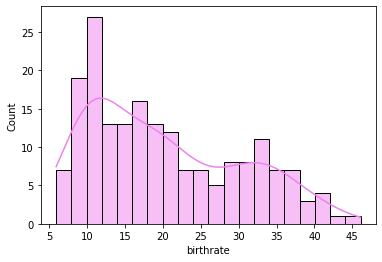

In [6]:
#birthrate
#sns.histplot(x = "birthrate", data = df, color = "violet");
sns.histplot(x = "birthrate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 );


En general se observa que la tasa de natalidad es baja porque se concentran mas paises  en los rangos bajos de tasa de natalidad.

2. ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

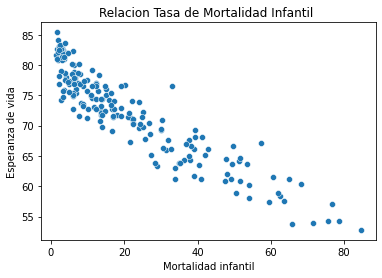

In [7]:
#infantmortality
sns.scatterplot(x = "infantmortality", 
                y = "lifeexpectancy", 
                data = df)

# cambiamos los nombres de los ejes
plt.ylabel("Esperanza de vida")
plt.xlabel("Mortalidad infantil")
plt.title('Relacion Tasa de Mortalidad Infantil ');

En los paises en los que la esperanza de vida es mas alta la mortalidad infantil es mas baja y viceversa.

3. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

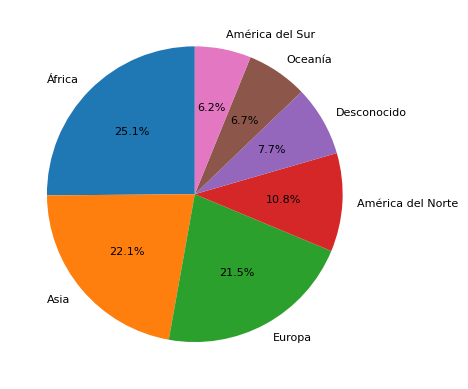

In [24]:

num_paises_continente = df['continente'].value_counts()
max_continent = num_paises_continente.idxmax()
porcentaje_continente = (num_paises_continente/df.shape[0]) *100

plt.pie(porcentaje_continente, labels= porcentaje_continente.index,
        data = num_paises_continente, 
        autopct=  '%1.1f%%', 
        textprops={'fontsize': 8}, 
        startangle=90);

4. ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos. s

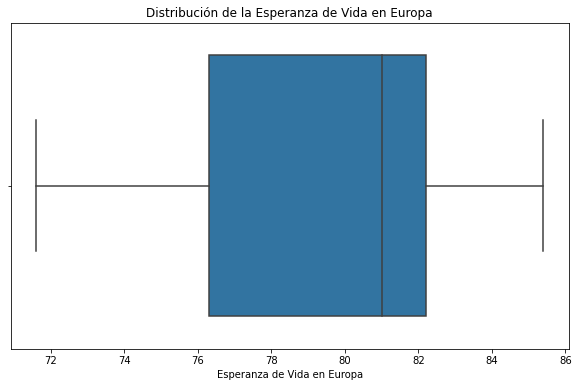

In [15]:
europe_df = df[df['continente'] == 'Europa']

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea un boxplot
sns.boxplot(x='lifeexpectancy', data=europe_df)
plt.xlabel('Esperanza de Vida en Europa')
plt.title('Distribución de la Esperanza de Vida en Europa')

# Calcula el rango intercuartil (IQR)
Q1 = europe_df['lifeexpectancy'].quantile(0.25)
Q3 = europe_df['lifeexpectancy'].quantile(0.75)
IQR = Q3 - Q1

# Calcula los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# No hay valores atípicos en el análisis

5. ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

Text(0.5, 1.02, 'Relaciones entre variables')

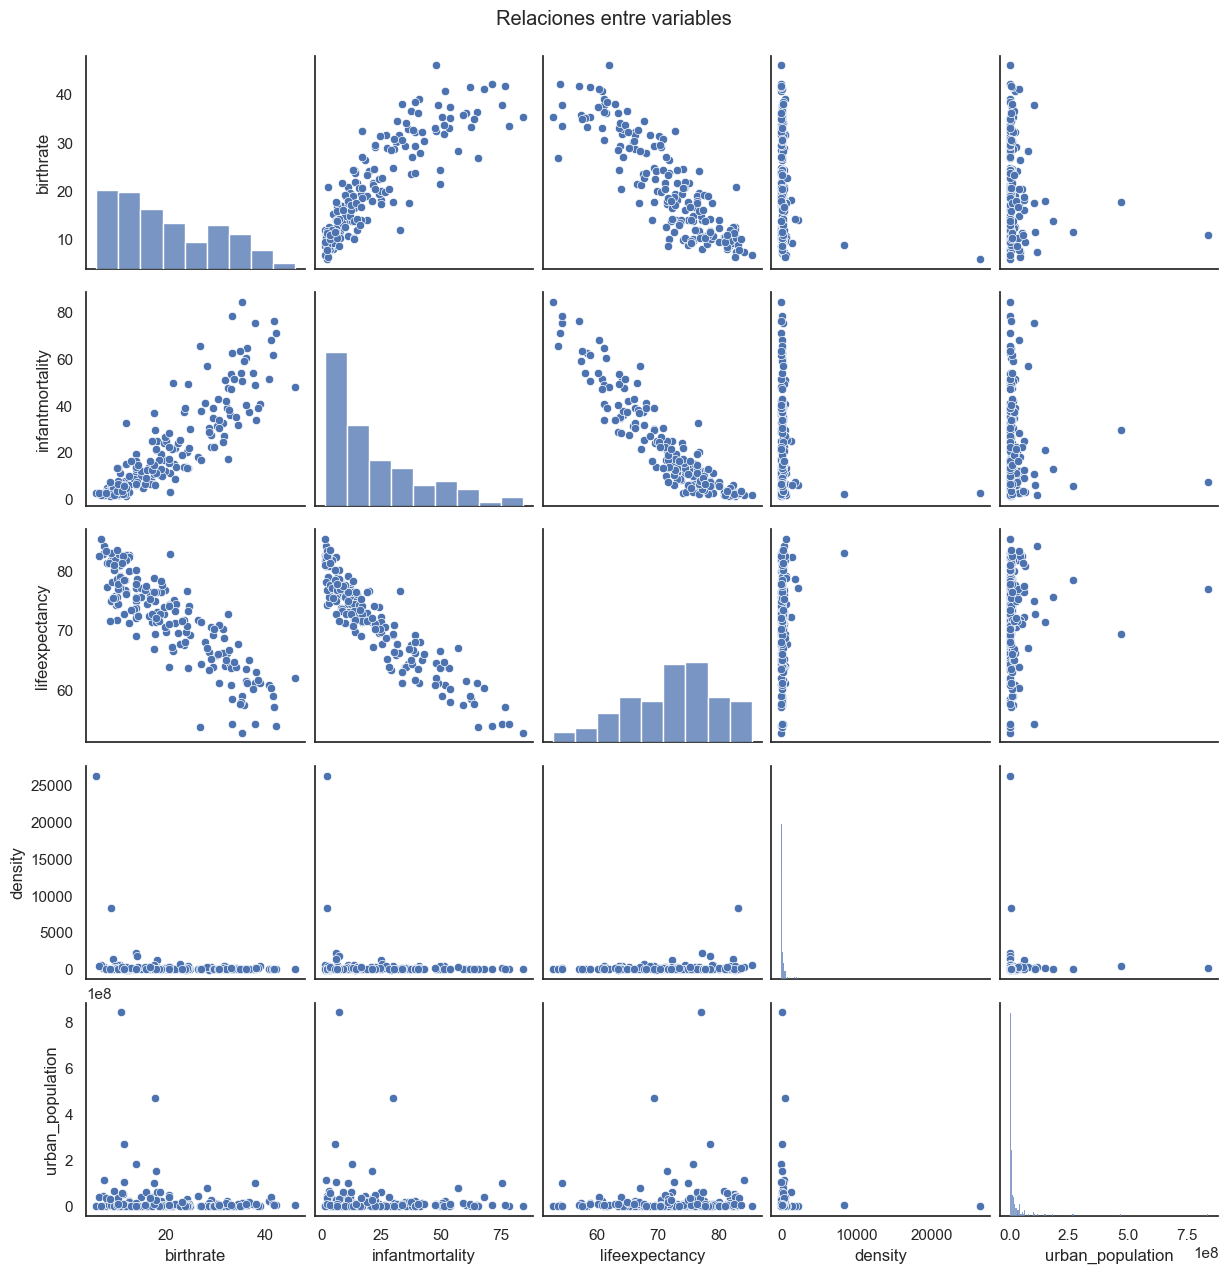

In [31]:

variables_a_relacionar = ['birthrate', 'infantmortality', 'lifeexpectancy', 'density', 'urban_population']


df_relaciones = df[variables_a_relacionar]

# Creamos un gráfico de dispersión con subgráficos (subplot)

sns.set(style="white")
sns.pairplot(df_relaciones)
plt.suptitle('Relaciones entre variables', y=1.02)



6. Cuáles son los 10 países con la mayor área forestal?

/var/folders/vc/6zzvx8k5237dtyhf94hsl1580000gp/T/ipykernel_39038/3248024993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='country', y='forestedarea', data=top_forest_countries, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Suriname'),
  Text(1, 0, 'Federated States of Micronesia'),
  Text(2, 0, 'Gabon'),
  Text(3, 0, 'Seychelles'),
  Text(4, 0, 'Palau'),
  Text(5, 0, 'Guyana'),
  Text(6, 0, 'Laos'),
  Text(7, 0, 'Solomon Islands'),
  Text(8, 0, 'Papua New Guinea'),
  Text(9, 0, 'Finland')])

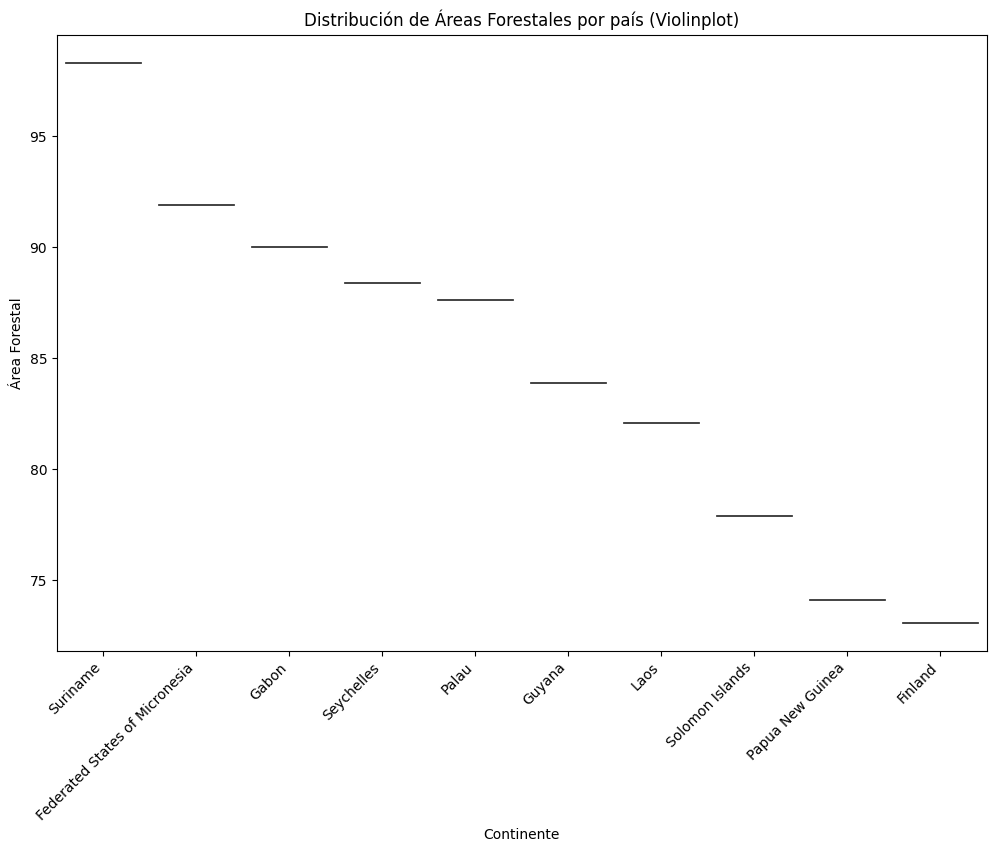

In [25]:
top_forest_countries = df.nlargest(10, 'forestedarea') #para ver los 10 paises con mas area forestal (nlargest lo vimos en el examen)

plt.figure(figsize=(12, 8))
sns.violinplot(x='country', y='forestedarea', data=top_forest_countries, palette='viridis')

plt.xlabel('Continente')
plt.ylabel('Área Forestal')
plt.title('Distribución de Áreas Forestales por país (Violinplot)')
plt.xticks(rotation=45, ha='right')

7. ¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?

Text(0.5, 1.0, 'Distribución de la Tasa de Natalidad por Continente')

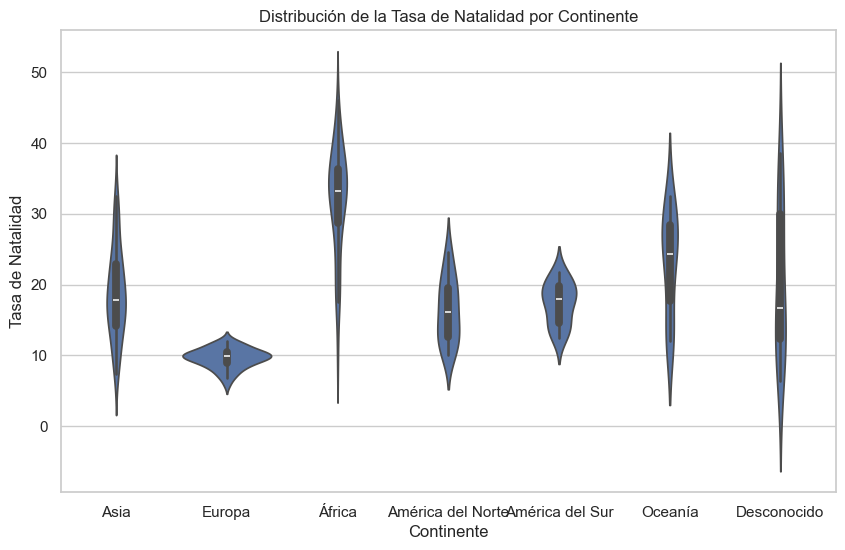

In [32]:
# Lo hacemos primero con el violin
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x="continente", y="birthrate", data=df)
plt.xlabel("Continente")
plt.ylabel("Tasa de Natalidad")
plt.title("Distribución de la Tasa de Natalidad por Continente")


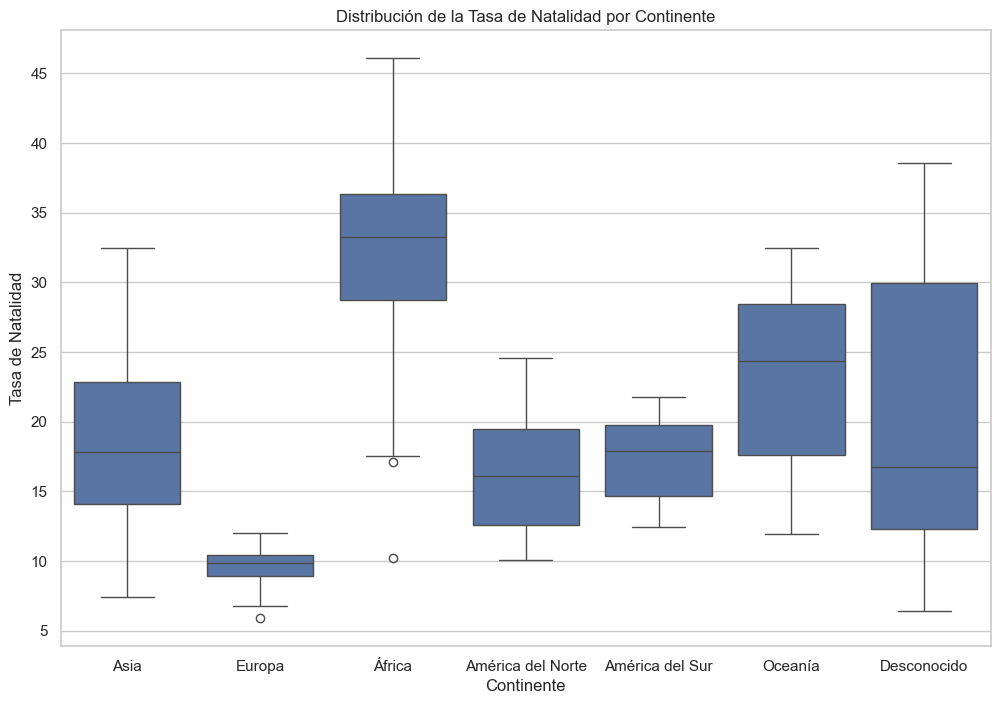

In [33]:
#Lo hacemos ahora con el boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x="continente", y="birthrate", data=df)

# Añadir etiquetas y título
plt.xlabel("Continente")
plt.ylabel("Tasa de Natalidad")
plt.title("Distribución de la Tasa de Natalidad por Continente")

# Mostrar el gráfico
plt.show()


8. Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.

Text(0.5, 1.0, 'Relación entre CPI y Precio de la Gasolina con Línea de Tendencia')

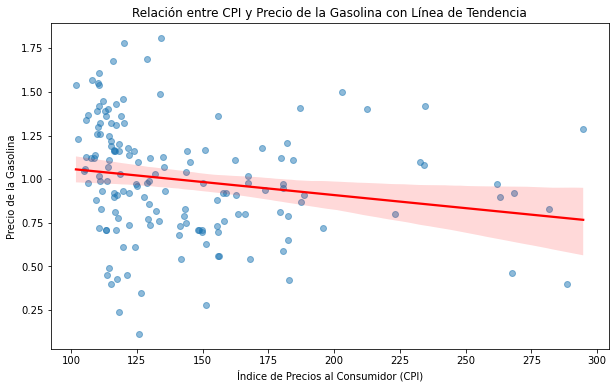

In [25]:
df_filtrado = df[(df['cpi'] >= 100) & (df['cpi'] <= 300)]

plt.figure(figsize=(10, 6))
sns.regplot(x='cpi', y='gasolineprice', data=df_filtrado, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel('Índice de Precios al Consumidor (CPI)')
plt.ylabel('Precio de la Gasolina')
plt.title('Relación entre CPI y Precio de la Gasolina con Línea de Tendencia')


9. ¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.

Text(0.5, 1.0, 'Distribución de la Esperanza de Vida en Países de Oceanía por Idioma Oficial')

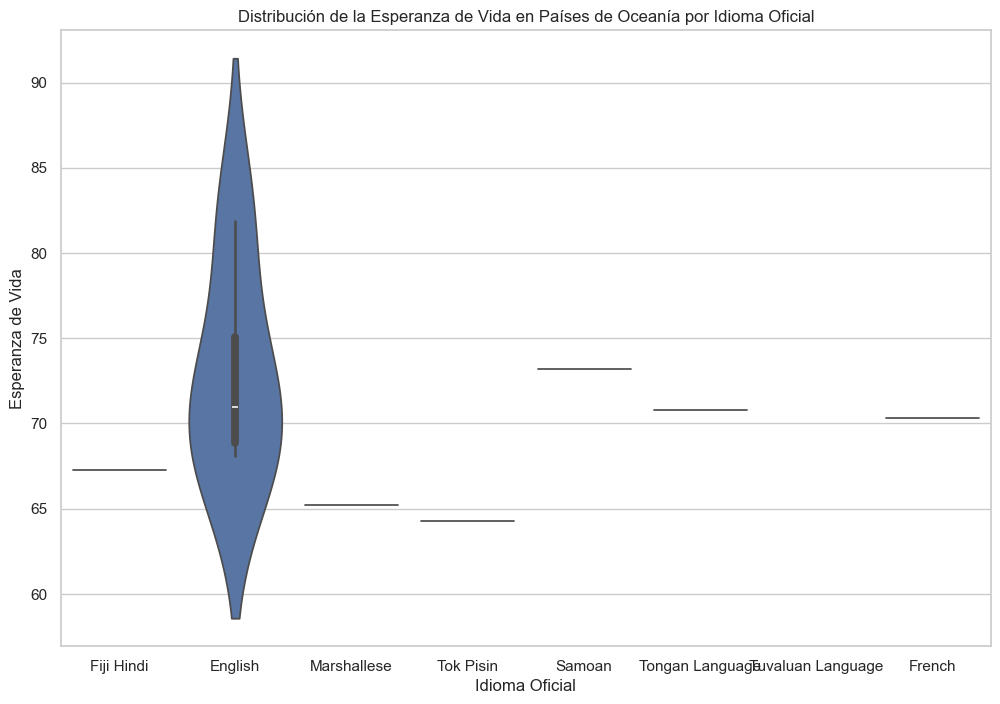

In [34]:

df_oceania = df[df['continente'] == 'Oceanía']
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.violinplot(x="officiallanguage", y="lifeexpectancy", data=df_oceania)
plt.xlabel("Idioma Oficial")
plt.ylabel("Esperanza de Vida")
plt.title("Distribución de la Esperanza de Vida en Países de Oceanía por Idioma Oficial")



10. Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:
Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.
Un histograma de la tasa de impuestos total.
Un gráfico de barras que resuma la tasa de impuestos total por continente.

In [26]:
df.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'lattitude', 'longitude',
       'continente'],
      dtype='object')

In [ ]:
sns.histplot(x = "birthrate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 );

Text(0.5, 0, 'Tasa de Impuestos Total')

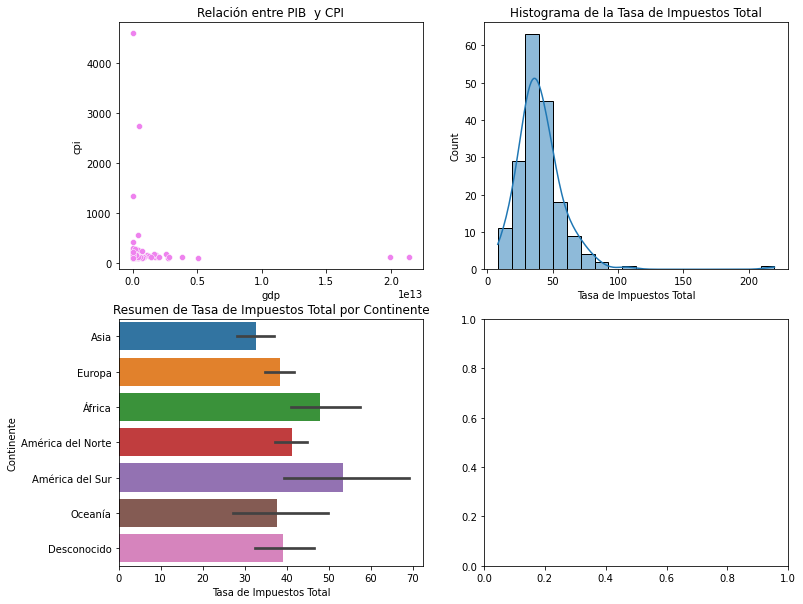

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot: relación entre PIB per cápita y CPI
sns.scatterplot(x='gdp', y='cpi', data=df, color = "violet", ax=axes[0, 0])
axes[0, 0].set_title('Relación entre PIB  y CPI')

# Histograma de la tasa de impuestos total
sns.histplot(df['totaltaxrate'], bins=20, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Histograma de la Tasa de Impuestos Total')
axes[0, 1].set_xlabel('Tasa de Impuestos Total')

# Gráfico de barras: resumen de la tasa de impuestos total por continente
sns.barplot(x='totaltaxrate', y='continente', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Resumen de Tasa de Impuestos Total por Continente')
axes[1, 0].set_ylabel('Continente')
axes[1, 0].set_xlabel('Tasa de Impuestos Total')


